### 机器学习在网络空间安全中的应用流程

机器学习在网络安全研究中的一般应用流程，主要包括安全问题抽象、数据采集、数据预处理以及模型效果评估6个阶段。

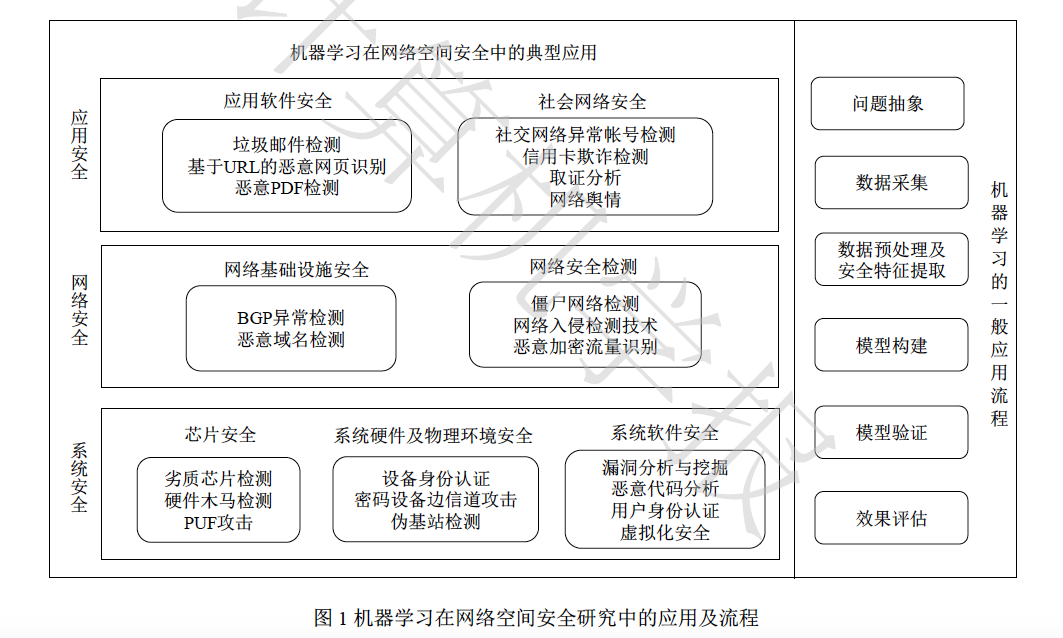

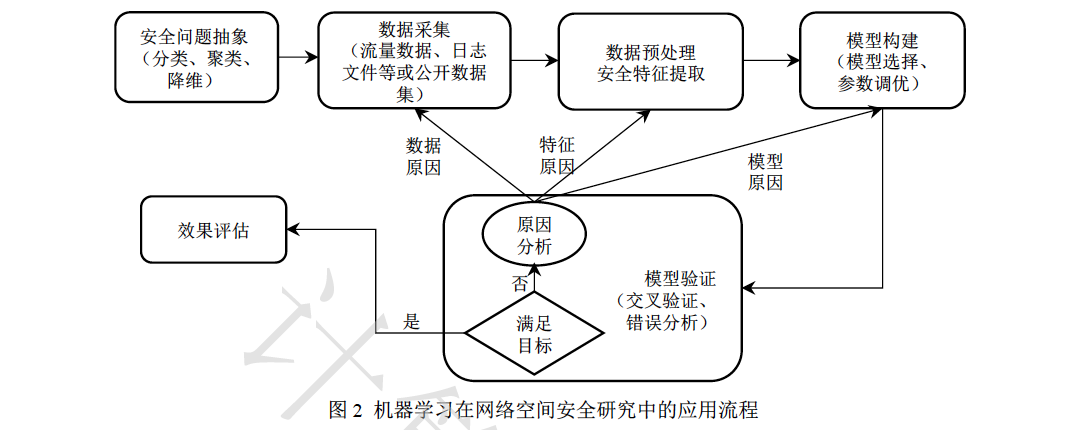

#### 安全问题抽象

将安全问题映射为机器学习能够解决的问题，如分了、聚类以及降维问题。

如下图，对劣质芯片或硬件木马的检测、伪基站检测、虚拟化安全、信用卡欺诈等都可以抽象为分类问题；设备身份认证、社交网络异常账号检测、网络入侵检测等可以抽象为聚类问题；用户身份认证、恶意/异常/入侵检测、取证分析、网络舆情等既可以抽象为分类问题也可以抽象为聚类问题。如果是高维数据的处理，可以抽象为降维问题，例如在设备身份认证、恶意网页识别问题中，由于数据维度过高，可以利用机器学习主成分分析算法、奇异值分解算法等对数据进行降维操作。

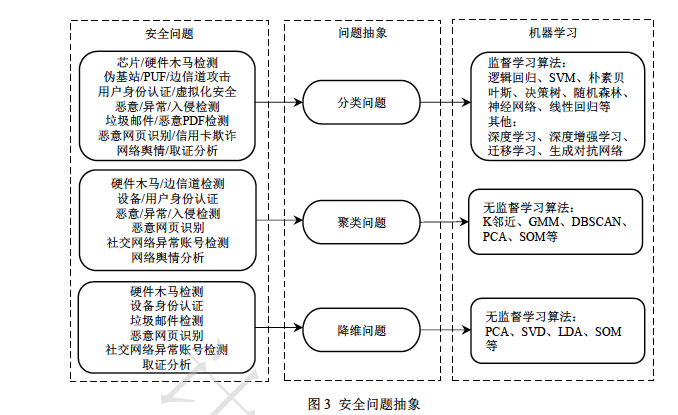

#### 数据采集

数据采集阶段主要利用各种手段，如wireshark、netflow、日志收集工具等，从系统层、网络层及应用层采集数据。

系统层数据用于系统安全问题的研究，这类数据主要有芯片信息、设备信息、系统日志信息以及实时运行的状态信息等，主要用于芯片安全、设备安全及系统软件安全，例如采集基站的位置信息、短信日志等数据用于伪基站检测研究。

网络层数据指与具体网络活动密切相关的数据，目前常用的是网络包数据或网络流数据，主要用于检测僵尸网络、网络入侵等，例如在企业内部网络中采集大量的真实的TCP流数据用于进行协议分类及异常协议检测研究。

应用层数据指网络空间中的各类应用软件产生及存储的数据，如邮件文本信息、web日志、社交网络文本信息、用户个人信息等，主要用于应用软件安全检测、网络舆情分析等，例如采集大量的URL数据用于恶意网页识别。

除自行采集数据外，目前安全领域有一些常见的公开数据集供研究者使用，如下表：

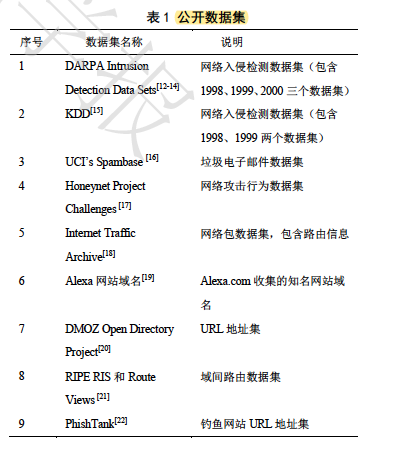

#### 数据预处理及特征提取

由于采集的原始数据存在数据缺失、非平衡、格式不规范、异常点等问题，需要再提取特征之前对原始数据进行清洗和处理，主要包括对数据规范化、离散化以及非平衡性的处理等。

* 数据预处理

在真实的网络环境中，采集的数据可能包含大量的缺失值、噪音，也可能由于人工录入失误而产生异常点。为了提高数据的质量，保障构建模型学习的效果，需要对数据进行清洗及归一化等预处理。数据预处理一般流程是先分析统计数据，然后对缺失值、异常值、重复值、噪音数据等进行清洗，清洗之后对数据进行归一化操作。例如从企业内部采集的TCP流数据，首先需要剔除重复数据、去噪音等规划化操作；然后对清洗后的数据进行聚合、归一化等处理。

* 数据缺失处理及异常值的处理

如果采集数据中某个特征缺失值较多时，通常会将该特征舍弃，否则可能会产生较大的噪音，影响机器学习模型的效果。当某个特征的缺失值较少时，可以采用固定值填充、均值填充、中位数填充、上下数据填充、插值法填充或者随机数填充等方法。有些机器学习模型诸如随机森林、贝叶斯网络及人工神经网络等，自身能够处理数据缺失的情况，不需要对缺失数据做任何的处理。

如果采集的数据集中存在的异常值，通常采用直接将该条数据删除，或将其视为缺失值处理。而在数据分析中，有些异常值并非是真的异常，而是确是发生的正常事件，只是高于平均而已，需要视情况而定。

* 非平衡数据的处理

在信用卡欺诈检测、网络入侵检测、移动终端恶意代码检测等安全问题中使用的数据集，异常数据样本或恶意数据样本远远少于正常样本。对于这种非平衡的数据集，直接使用机器学习算法构建检测模型效果往往不佳。为了解决非平衡数据问题，通常使用过采样或欠采样方法构造平衡数据集。欠采样是当数据量足够大时，通过减少多数类，即数据量占大多数的类别的样本量来平衡数据集，例如在信用卡欺诈检测中，减少正常账号的数据样本。过采样与欠采样相对，过采样适用于数据量不足的情况，通过复制、自举法等方法增加少数类的样本量来平衡数据集，例如增加伪造引用卡账号的数据样本。

* 数据集的分割

数据预处理完整后，还要进行机器学习模型所需数据集的准备工作。该工作主要将整理后的数据集分为三个集合：训练集、验证集和测试集。训练集用于机器学习模型的构建，验证集用于验证模型及参数调优，测试集用于评估模型在实际使用中的泛化能力。常用的数据集分割方法有随机抽样、交叉验证法等，例如网络入侵检测研究汇总，常采用随机抽样的方法分割数据集，即随机选择90%的数据作为训练集，随机选择10%的数据作为测试集，然后采用交叉验证法分割为训练集和验证集。

* 特征提取

特征提取指从数据中提取最具有安全问题的本质特性的属性。从清理后的数据中提取特征通常需要特定的领域知识，例如恶意网页的识别中需要从抓取的网页数据中提取主机信息特征、网页内容特征、静态链接及动态网页行为等特征。这些特征提取通常由具有一定领域知识的专业人员完成，这种人工完成特征提取的方式比较困难而且费时。近年来机器学习中新兴的深度学习是进行自动提取特征的一个很好的选择。

#### 模型构建

模型构建具有包含2个部分，即算法选择和参数调优。

监督学习算法常用于分类问题和回归问题，常见算法有逻辑回归、人工神经网络、支持向量机、决策树、随机森林、线性回归等。

非监督学习常用于聚类问题。常见的算法有K-Means算法、K近邻、基于密度的DBSCAN算法、层次聚类算法、图聚类算法等。

参与调优往往与训练目标、选择的算法相关，很多情况是依赖于个人经验。

#### 模型验证

模型验证主要评估训练的模型是否足够有效。

#### 效果评估

机器学习的模型评估主要关注模型的学习效果以及泛化能力。

常用的分类评估指标有正确率、查准率和查全率

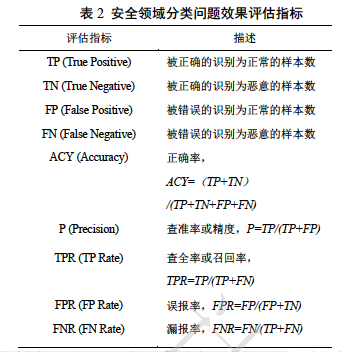

在不同领域可能需要不同的性能指标来衡量，如硬件木马检测、异常检测、网络入侵检测中会用到误报率FPR和漏报率FNR。在认证领域常使用吴识率FAR和拒识率FRR对模型进行效果评估。

在社交网络账号检测、异常检测等聚类问题中，模型的目标是同一簇的样本尽可能彼此相似，不同簇的样本尽可能不同，因此聚类问题常用的评估指标分为两类，一类是将聚类结果与某个参考模型进行比较；另一类是直接考察聚类结果而不利用任何参考模型。

### 机器学习在系统安全研究中的应用

系统安全中机器学习的应用有芯片、系统硬件及物理环境、系统软件。芯片安全方面包括劣质芯片检测、硬件木马检测及PUF攻击。系统硬件及物理环境安全包括设备身份认证、物理层边信道攻击即伪基站检测；系统软件安全包括漏洞分析与挖掘、恶意代码分析、用户身份认证及虚拟化安全。

#### 芯片安全

* 劣质芯片检测

有学者尝试利用机器学习技术来解决芯片安全问题，主要基于边信号分析、指纹识别和图像识别的劣质芯片和硬件木马检测。针对芯片知识产权保护安全，已有研究提出物理不可克隆函数（PUF）攻击，主要是利用机器学习技术推测由PUF生产的芯片知识产权保护标识。

传统检测方法例如物理检测中的材料分析、电子检测中的功能测试及结构测试等，代价昂贵又十分耗时。劣质芯片与原厂芯片芯片存在差异参数：一是边信道差异参数，包括正偏压温度不稳定性、负偏压温度不稳定性、热载流子注入、路径延迟等；而是芯片外形方面，例如颜色、擦痕等。

选取了原厂芯片的若干差异参数作为正例样本，使用单分类支持向量机训练劣质芯片分类器；或使用时钟扫描技术生产芯片路径延迟指纹，分别使用简单异常点分析SOA和主成分分析法PCA检测劣质芯片，PCA算法识别准确率由于SOA；基于西片外形的检测研究中，研究人员剔除利用芯片图像特征识别劣质芯片，收集劣质芯片数据，构建劣质芯片图片库，利用ANN算法提取待检测芯片图片的特征，自动分类芯片。缺点是当芯片外表颜色、痕迹等变化不明显时，无法检测出劣质芯片。

劣质芯片检测目前使用的机器学习技术主要是单分类分类器OC-SVM、异常检测技术SOA，银珠多数训练样本也只有一类可信芯片样本。无论是基于边信道差异参数还是利用图像识别技术，都只是在粗粒度上的应用，而在细粒度上还是准确率过低。

* 硬件木马检测

芯片的硬件木马通常指在原始芯片植入具有恶意宫能够的冗余电路。硬件木马通常分为物理上的木马（例如增加或删除晶体管、开关选择器、连接线等）和激活态的木马（例如触发器和负载）。被植入木马的芯片，其热量、功耗和延迟等边信道信号会有所改变，因此可以通过收集芯片边信道的参数指纹，在多维的空间对比，判断是否再可信芯片的指纹范围内。目前机器学习在硬件木马检测方向研究芯片原理图成像识别和边信道信号分析。

芯片原理图成像识别研究中，提出在逆向工程单层成像后，将实验芯片与可信芯片的成像图差值作为特征参数，使用OC-SVM算法进行检测。在公开的基准测试中，该方法检测芯片硬件木马有着较高的准确率，但当芯片成像图网格参数较小以及木马由较小参数篡改构造时，较难检测出硬件木马。

芯片原理图成像技术需要昂贵的设备支持，并且减少芯片层级会对芯片造成毁灭性破坏。所以一般研究都在分析边信道信号方向上。有利用可信芯片电路仿真、蒙特卡洛分析得到多维边信道信号数据，再利用PCA算法对数据做降维处理，然后通过非线性回归模型饿到边信道指纹，最后通过OC-SVM算法进行分类识别。

还利用KMM＆均值匹配的参数迁移学习算法对边信道信号进行校正，以及利用基于统计分析的参数建模方法对蒙特卡洛仿真电路进行校正。

利用可信芯片和植入硬件木马的芯片的能耗差值的时域图，通过离散傅里叶变换变换到频域，然后利用SVM算法学习能耗差值的频域特征，从而识别出带有硬件木马的芯片。

在真实的FPGA密码设备上，利用OC-SVM算法构建了硬件木马检测平台，并做了8位和128位最低有效位的两组实验，与基于模板的硬件木马检测方法对比，发现利用OC-SVM检测硬件木马的准确率和误报率均更优。

芯片原理图成像识别、边信道信号分析虽然都能在一定程度上检测出硬件木马。然而，它们的前提是硬件木马对芯片的电路或边信道参数有明显的改变，非常小的改变或深度隐藏的硬件木马很难被检测出。

* PUF攻击

物理不可克隆函数PUF电路是一种根据芯片在制造过程中的差异性产生性产生独特的激励-响应对的电路。通过这种PUF电路课生成该芯片唯一的标识，通常这种标识很难被复制，因此PUF电路生成的光学PUF、图层PUF、硅PUF等表示被用于保护芯片知识产权。然而，已有研究利用机器学习对PUF生成的标识进行攻击。

利用逻辑回归、SVM和进化策略攻击了Arbiter仲裁器PUF、环形振荡器PUF、异或门仲裁器PUF、轻量级安全PUF和前向反馈PUF、其攻击原理是收集给定PUF的激励响应对，利用机器学习算法推测任意激励下该PUF的响应值。针对各类PUF，作者在不同电路位数、机器学习算法下做了攻击实验，均取得了较高的准确率，并得出结论：所有的强类型PUF均不安全，其它类型PUF可通过增加电路为数、电路设计复杂性来增强安全性。

针对64位Arbiter仲裁器PUF产生的激励响应对，使用人工神经网络和SVM进行硅PUF攻击模型的有效性策略。实验显示，当训练集为500个激励-响应对时，产生了90%正确率的PUF攻击模型，当训练集为5000个激励-响应对时，产生了更高准确率的PUF攻击模型。这表明训练数据越大，PUF攻击成功率越高。

上述PUF攻击研究表明基于PUF的芯片知识产权保护存在极大的漏洞，需要进一步增强PUF的安全性，例如增加PUF电路位数、电路设计复杂性等。

#### 系统硬件及物理环境安全

因基于MAC地址进行认证的方式很容易被伪造，就有了基于硬件自身指纹特征的设备身份认证技术。

而机器学习在设备身份认证技术中的应用，主要有暂态信号、调制信号和频谱响应者三类指纹特征。

在网络空间物理环境中，系统硬件与外部设备进行信息交换或通信时常常会遇到信息泄露、中间人攻击，例如常见的物理层边信道攻击、伪基站。

* 设备身份认证

基于机器学习的设备身份认证是指从信号中提取反映设备身份的特征，然后生成可用于识别设备的指纹，再通过机器学习算法识别设备指纹，从而实现设备身份的认证。基于机器学习技术的设备身份认证流程包括策略信号、提取信号特征、降低维度、生成指纹及指纹识别5个阶段。

利用设备开关的暂态特征实现设备身份的指纹识别。具体过程为，测量设备暂态信号中含有幅度和相位信息的复包络，将暂态信号的方差变量作为暂态特征，并采用自组织映射网络SOM降低暂态特征的数据维度，最后利用概率神经网络PNN对设备指纹进行识别。在不同的电源电压、环境温度以及信道噪声的条件下实验，发现环境变化让识别性能明显下降，单颗通过在环境变量更大差异的条件下收集暂态信号，使性能得到补偿，从而提高识别准确率。

针对无限网络设备，提出了基于调制信号的设备身份认证技术。该方法使用SVM和K近邻算法分别进行认证设备身份。实验结果表明，SVM的识别率比K近邻算法较高，但运算速度较慢。原因在于，SVM算法需要将输入数据映射到更高维的向量空间，而K近邻算法相对简单，不需要做数据预处理。该方法的缺点是需要收集设备的传输数据，从而带来一定的隐私安全问题。

基于调制信号和频谱响应信号的RFID设备应答器的物理层认证技术。具体过程为，首先提取设备的调制信号和频谱响应，采用PCA降低特征数据的维度，然后生成设备指纹，最后再利用K近邻算法实现设备识别。但在交叉验证时，发现该方案仅能在可控的环境下进行，距离较远时（例如超过1米）则无法识别设备指纹。

利用机器学习实现智能手机和平板电脑设备的身份认证。不同于传统的通过cookie和设备ID来进行身份热证，文章利用不同的传感器对同样的运动刺激会产生不同的响应的原理，提出利用设备内部传感器指纹实现设备的认证。具体流程为，手续爱你从加速度传感器产生的运动路径的时域、频域信号中提取了若干特征数据，生成传感器指纹，然后利用随机森林算法对设备传感器进行指纹识别。这种方法可以追踪用户踪迹，因此对用户隐私安全造成威胁。

* 物理层边信道攻击

含有密码算法的设备在工作状态时，会在店员工号消耗、密码算法执行时间、电磁辐射、故障情况的输出等方面产生于密钥相关的变化信息，这些信息即为物理层边信道信息。物理层边信道攻击则是利用物理层边信道信息找出设备的加密信息的一种攻击方式。在物理层边信道攻击研究中，与机器学习结合的方法主要有模板攻击和能耗分析攻击。

在模板研究中，将最小二乘支持向量机LS-SVM算法应用到模板攻击边信道中。在模板刻画阶段，首先使用多元高斯分布刻画边信道泄露数据的分布特征，并利用皮尔逊相关系数和PCA算法得到特征；在密钥恢复阶段，利用LS-SVM算法进行模式匹配实施攻击。作者实验发现LS-SVM算法对于攻击效果和汉明重置泄露有显著的影响，但对能耗和时间的影响却不明显。

在模板攻击中，边信道攻击通常假设密码设备完全被控，为了对该假设进行松弛，提出的利用半监督学习算法一般化模板攻击，同样能够推出汉明重置子密码，该方法虽然准确度小于普通的模板攻击，但不需要那么强的假设。

模板攻击不仅依赖参数假设、先验知识，而且受限于低维环境。为了解决这个问题，提出了基于松弛假设和高维度特征向量的查分能耗分析DPA攻击，将能耗和密钥关系形成化成一个监督学习任务。特征选取对比实验了排序法、主成分分析法、自组织映射、最大相关最小冗余算法，分类器对比实验了SOA、SVM、随机森林，然后采用弃一法交叉验证来评估模型的效果，并选择最佳分类器用于推测密钥。

在物理层边信道攻击研究中，利用物理环境泄露的信息，采用机器学习进行模板攻击、能耗分析攻击是最有效的攻击方式。相比而言，由于能耗分析攻击效果优于模板攻击，且不需要很多假设与限制，因此能耗分析攻击是较优的方式。从安全防御角度看，应积极探索应对基于机器学习的物理层边信道攻击的方法，例如增加边信道噪声以混淆边信道信息；此外，还要考虑到基于机器学习的攻击思路能否推广到其它类型的边信道攻击，并提前部署应对措施。

* 伪基站检测

2G/3G/4G即兼容模式的基站构成了移动通信网络的基础设施。然而，GSM(2G)网络协议的安全缺陷使得不同经过网络使用者的认证，犯罪分子利用伪基站就可直接攻击用户。例如攻击者利用ISMI扑捉器堵塞3G/4G网络，迫使用户收集介入2G网络，随后向该用户发送垃圾邮件或诈骗短信。

基于机器学习的ISMI捕捉器检测系统，组要包括在线检测和离线学习两部分。在线检测由若干单类SVM、神经网络等构成的异常检测器组成，主要利用的环境属性特征包括2G、3G之间的模式转变、真正基站检测到的手机信号消失的时间、加密的禁用等；然后通过集成算法集成强检测器，再结合安全专家判断，最后将综合结果反馈给离线学习部分以更新检测器参数。

利用将近1亿的众包数据和SVM算法，研制了大规模伪基站检测系统。整个系统由3个模块（即内容分析，内容分析和SVM聚类）和4个数据集（权威电话号码表、基站位置数据库、WiFi位置数据库和短信日志库）组成，完成伪基站定位和短信分类。

在基于机器学习的伪基站检测的研究中，因存在没有真实的伪基站训练集、无法展示不同基站设备间的关联关系等问题，仅仅是将机器学习机器检测伪基站作为一个可能的方案，因此需要进一步研究如何收集真实的训练集数据、确定微基站的区域。

#### 系统软件安全

在系统软件层面，目前机器学习在系统软件安全中心的研究主要集中在漏洞分析与挖掘、恶意代码分析、用户身份认证以及虚拟化安全等方面。

* 漏洞分析与挖掘

漏洞是指系统在硬件、软件及协议的具体实现中或系统安全策略设计上存在的缺陷和不足，从而威胁、损坏单元计算系统的安全。漏洞识别研究已有多年，例如利用漏洞的特征进行识别、随机测试技术（例如模糊测试）以及利用污点分析、符号执行等分析方法。然而，这些方法实际中很难被有效利用，并且只有少部分的安全缺陷能够自动地被识别，大部分的安全漏洞仍然依靠冗长的代码审计。

从基于函数形式的源码中提取出API符号，利用PCA自动地识别API用途的特征，从而发现了0day漏洞；在深度的二进制程序漏洞静态分析过程中，研究人员提出利用深度学习中的循环神经网络识别函数；还提出了代码漏洞漏检自动识别方法，即通过语法抽象图和词袋模型（代码的特征描述），利用机器学习方法进行分析。该方法能够准确地识别出是否真正的漏检，并且还挖掘了若干0day漏洞。

在漏洞预测方面，有提出基于SVM集成学习的软件组件早期漏洞的识别方法；基于机器学习文本挖掘方法预测软件源码中含有的安全漏洞；利用自然语言处理中的N-gram模型和统计特征选择来预测漏洞；基于人工手写不定的特征，利用概率模型自动生成补丁，以自动修复漏洞。

在漏洞分析与挖掘方面，近年来刚开始出现基于机器学习的漏洞识别、漏洞预测和漏洞修复，还没有形成一个较为成熟的应用体系。更为重要的是，根据莱斯定理，利用一个程序自动地检测另一个程序中是否含有漏洞，在一般情况下是不可判定的。在这个限制下，现有的漏洞挖掘研究主要集中在发现特定类型的漏洞，因此利用机器学习推断未知漏洞在理论上是否可信仍是一个问题。总之，未来研究出来考虑进一步提升机器学习在漏洞挖掘的应用性能（例如识别率、查全率），也应考虑到机器学习应用在漏洞挖掘领域的理论支撑。

* 恶意代码分析

恶意代码由木马、蠕虫、病毒等，分析技术有静态分析和动态分析。静态分析恶意程序指令和结构；动态分析一般在隔离环境，如模拟器、沙盒内运行，并分析其行为。

静态分析方面，收集软件尽可能多的特征，并嵌入联合特征向量空间中，通过SVM检测其中的恶意代码；或只用N-gram模型从原始恶意代码中提取训练集，然后对比了朴素贝叶斯、SVM、决策树等算法，并将这些弱分类器算法集成提升为强分类器算法，即AdaBoost算法，取得了良好的检测效果。

在动态分析方面，通过二进制文本和运行行为提取特征，利用朴素贝叶斯分类算法对特征进行分类，判断内核驱动是否含有Rootkit；选取信息、内容、时间和连接四个网络行为特征，利用贝叶斯网络和随机森林方法取得了好的准确率；基于动态行为、请求徐克、请求时间序列、敏感程序接口四个特征，提出了基于机器学习的恶意软件检测流处理框架，并在分布式实时计算框架storm上实现了系统原型，同时提高了检测效率和准确率

* 用户身份认证

在基于机器学习的用户身份认证研究方面，主要有利用机器学习攻击传统用户身份认证方法和利用机器学习涉及新的用户身份认证机制两个研究点。

基于机器学习的验证码攻击，即程序自动识别验证码，该验证码的分类器时多个SVM分类器的结合，用于训练从验证码图片中提取的颜色和文本特征。

基于计算机视觉，提出了自动盲识别触屏设备的输入密码，在其攻击模型中，通过DPM模型来检测和追踪目标设备，并利用光学流算法自动识别触摸帧以及利用K-means聚类算法来识别触摸点。

基于可穿戴设备传感器边信道信号，推断出来用户的键盘密码输入，其技术思路为：首先建立可穿戴设备运动模型，然后从可穿戴设备提取数据、预处理、特征提取，接着采用经典的机器学习算法（如随机森林，K近邻，SVM、神经网络等），对比试验结果显示，K近邻算法最佳。

基于触屏特征-加速度、压力、大小和时间，提出了一个免打扰的用户认证机制，使用单分类学习算法来验证是否是合法用户。

基于传感器增强的击键行为特征，在安卓系统上实现了包含多种特征提取和识别算法（有SVM、朴素贝叶斯、马氏距离算法、K近邻等）的用户认证系统了实验发现当识别算法为K近邻且K=1时效果最佳，且比基于动作的认证机制高了一个数量级的等错率，比传统的击键认证方案准确率高了两个数量级的等错率。

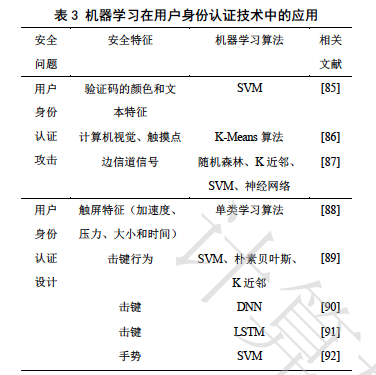

* 虚拟化安全

目前虚拟化安全问题主要是虚拟机隔离安全，而边信道攻击又是机器学习的虚拟机安全中的一大威胁。

在基于机器学习的虚拟机攻击研究中，共享高速缓存架构例如一级高速缓存、最后一级高速缓存常备作为跨虚拟机攻击的通道。

2012首次提出了通道驱动额跨虚拟机的边信道攻击，在堆成多处理环境下，将一级高速缓存作为攻击通道，通过素数探针实现统一物理机上的恶意虚拟机从受害虚拟机中提取细粒度信息，再利用SVM算法分类Cache信息，并给予代码路径的隐马尔可夫模型来提高SVM输出的准确性，从而最终获取了受害袭击用开源加密库Libgcryp实现的EIGamal加密的密钥。

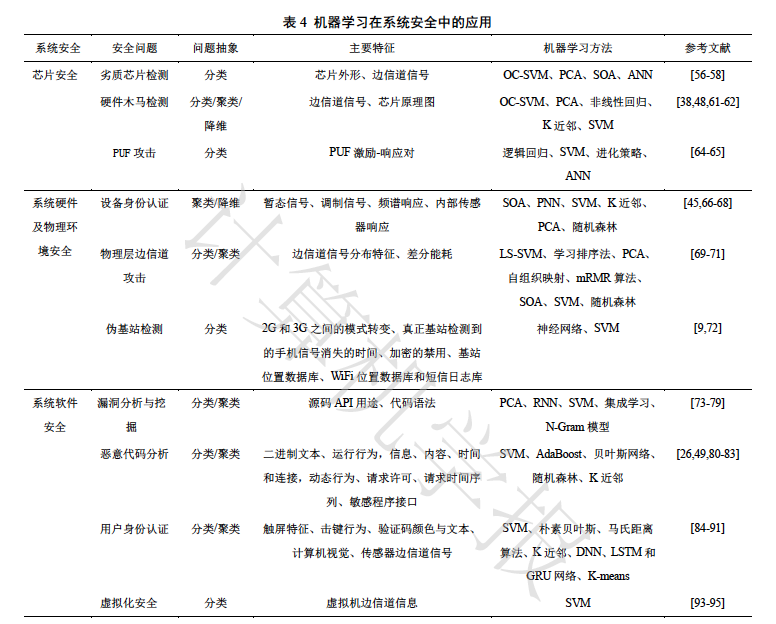